# Environment 

In [2]:
from openai import OpenAI
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
API_SECRET_KEY = "Your key"

# Data

The first step is to get your data either from the KG or from the project. If you need to get some data as context or few-shot examples from the KG, langchain could seamlessly bridge the KG and the LLM.This part of code is omitted.

Since LLMs have context window limit, so control the tokens within, like 4096 tokens, it depends.

And may sure the chunk you prepared for mapping contains no isolated products or tasks. I.e., there shouldn't be a product that actually matched no task in the chunk.

In [3]:
sublist2=[('visual inspection for door panel fixing', 'door panel'), ('proper installation check for door panel fixing', 'door panel'), ('gap alignment check for door panel fixing', 'door panel'), ('review sample for installation of hinges', 'hinge'), ('visual inspection for installation of hinges', 'hinge'), ('verify compliance for installation of hinges', 'hinge'), ('review sample for installation of overhead door closer', 'overhead door closer'), ('visual inspection for installation of overhead door closer', 'overhead door closer'), ('verify compliance for installation of overhead door closer', 'overhead door closer'), ('water spray test for door/window', 'timber door'), ('water spray test for door/window', 'non-frp timber door'), ('water spray test for door/window', 'frp timber door'), ('water spray test for door/window', 'hardwood solid core flush doors'), ('water spray test for door/window', 'aluminium window'), ('electrical continuity test for door/window', 'timber door'), ('electrical continuity test for door/window', 'non-frp timber door'), ('electrical continuity test for door/window', 'frp timber door'), ('electrical continuity test for door/window', 'hardwood solid core flush doors'), ('electrical continuity test for door/window', 'aluminium window'), ('review sample for aluminum extruded section include ironmongery', 'hinge'), ('review sample for aluminum extruded section include ironmongery', 'handle'), ('review sample for aluminum extruded section include ironmongery', 'latch'), ('review sample for aluminum extruded section include ironmongery', 'door ironmongery'), ('review sample for aluminum extruded section include ironmongery', 'locks'), ('review sample for aluminum extruded section include ironmongery', 'door slides'), ('review sample for aluminum extruded section include ironmongery', 'drawer slides'), ('brand name check for aluminum extruded section include ironmongery', 'hinge'), ('brand name check for aluminum extruded section include ironmongery', 'handle'), ('brand name check for aluminum extruded section include ironmongery', 'latch'), ('brand name check for aluminum extruded section include ironmongery', 'door ironmongery'), ('brand name check for aluminum extruded section include ironmongery', 'locks'), ('brand name check for aluminum extruded section include ironmongery', 'door slides'), ('brand name check for aluminum extruded section include ironmongery', 'drawer slides'), ('visual inspection for  aluminum extruded section include ironmongery', 'hinge'), ('visual inspection for  aluminum extruded section include ironmongery', 'handle'), ('visual inspection for  aluminum extruded section include ironmongery', 'latch'), ('visual inspection for  aluminum extruded section include ironmongery', 'door ironmongery'), ('visual inspection for  aluminum extruded section include ironmongery', 'locks'), ('visual inspection for  aluminum extruded section include ironmongery', 'door slides'), ('visual inspection for  aluminum extruded section include ironmongery', 'drawer slides'), ('measure dimension  for aluminum extruded section include ironmongery', 'hinge'), ('measure dimension  for aluminum extruded section include ironmongery', 'handle'), ('measure dimension  for aluminum extruded section include ironmongery', 'latch'), ('measure dimension  for aluminum extruded section include ironmongery', 'door ironmongery'), ('measure dimension  for aluminum extruded section include ironmongery', 'locks'), ('measure dimension  for aluminum extruded section include ironmongery', 'door slides'), ('measure dimension  for aluminum extruded section include ironmongery', 'drawer slides'), ('2mm thickness check for aluminum extruded section include ironmongery', 'hinge'), ('2mm thickness check for aluminum extruded section include ironmongery', 'handle'), ('2mm thickness check for aluminum extruded section include ironmongery', 'latch'), ('2mm thickness check for aluminum extruded section include ironmongery', 'door ironmongery'), ('2mm thickness check for aluminum extruded section include ironmongery', 'locks'), ('2mm thickness check for aluminum extruded section include ironmongery', 'door slides'), ('2mm thickness check for aluminum extruded section include ironmongery', 'drawer slides'), ('review sample for glass', 'glass panel')]

In [ ]:
print("sublist2: ",len(sublist2))

In [5]:
def p_iT_list(tuples_list):
    first_elements = [item[0] for item in tuples_list]
    second_elements = [item[1] for item in tuples_list]
    first_elements=list(set(first_elements))
    second_elements=list(set(second_elements))
    return first_elements,second_elements

In [6]:
iT_test_2,p_test_2=p_iT_list(sublist2)

In [7]:
print(iT_test_2)
print(p_test_2)

['measure dimension  for aluminum extruded section include ironmongery', 'water spray test for door/window', '2mm thickness check for aluminum extruded section include ironmongery', 'review sample for aluminum extruded section include ironmongery', 'visual inspection for door panel fixing', 'review sample for glass', 'visual inspection for installation of hinges', 'gap alignment check for door panel fixing', 'review sample for installation of hinges', 'verify compliance for installation of hinges', 'review sample for installation of overhead door closer', 'proper installation check for door panel fixing', 'visual inspection for installation of overhead door closer', 'verify compliance for installation of overhead door closer', 'electrical continuity test for door/window', 'brand name check for aluminum extruded section include ironmongery', 'visual inspection for  aluminum extruded section include ironmongery']
['glass panel', 'door ironmongery', 'hinge', 'hardwood solid core flush doo

# prompts

In [ ]:
fprompt2=f"""
You're a quality inspector in a manufacturing factory for Modular integrated Construction projects in Hong Kong. Now You can do precise mappings between a list of products and their respective inspection tasks.

Notably:
1. A single product may require multiple inspection tasks.
2. Conversely, a single inspection task could be relevant to several products.

To achieve accurate mappings, follow these structured steps:
1. Examine Inspection Tasks: Begin by reviewing each inspection task individually from the provided list.
2. Identify Related Products: For every inspection task, cross-reference the product list to find all applicable products. Do not hesitate to create multiple mappings for a single task. There is no upper limit to the number of mappings you can make. The goal is to ensure that all related products are thoroughly mapped to their respective inspection tasks.
3. Ensure Comprehensive Coverage: After mapping each inspection task to its related products, conduct a final review of all mappings. This step is to confirm that no product has been overlooked and each one is accounted for in the mappings.

Guidelines:
1. Use Provided Lists Exclusively: Your mappings should solely utilize the items from the provided lists below. Refrain from incorporating any external elements.
2. Output Format: Present your final mappings as a Python list of tuples in the format ("inspection task", "product"), ensuring that the structure is maintained throughout.

Sample mappings for your reference:
[('material certificate for pipework and fittings', 'copper pipes'),
 ('dimension check for window type ac installation', 'window type ac'),
 ('dimension check for window type ac installation', 'air filters'),
 ('quantity check for window type ac installation', 'activated carbon filter'),
 ('visual inspection for installation of lighting', 'lighting fittings'),
 ('sample for seal, seal accessories', 'structual sealant'),
 ('sample for seal, seal accessories', 'weather sealants'),
 ('colour check for seal, seal accessories', 'tapes')]

Provided Lists:
Product List:
{p_test_2}
Inspection Task List:
{iT_test_2}

Desired Output Format: [ ('inspection task1', 'product1'), ... ('inspection taskN', 'productN') ]
"""

In [ ]:
print(fprompt2)


You're a quality inspector in a manufacturing factory for Modular integrated Construction projects in Hong Kong. Now You can do precise mappings between a list of products and their respective inspection tasks.

Notably:
1. A single product may require multiple inspection tasks.
2. Conversely, a single inspection task could be relevant to several products.

To achieve accurate mappings, follow these structured steps:
1. Examine Inspection Tasks: Begin by reviewing each inspection task individually from the provided list.
2. Identify Related Products: For every inspection task, cross-reference the product list to find all applicable products. Do not hesitate to create multiple mappings for a single task. There is no upper limit to the number of mappings you can make. The goal is to ensure that all related products are thoroughly mapped to their respective inspection tasks.
3. Ensure Comprehensive Coverage: After mapping each inspection task to its related products, conduct a final revi

# functions for data analysis and figures

In [8]:
def tasks_review(LLM_mappings,test_list):
    tasks_from_llm = set(iT for iT, _ in LLM_mappings)
    tasks_from_ground_truth = set(iT for iT, _ in test_list)

    all_tasks = tasks_from_llm.union(tasks_from_ground_truth)
    
    return all_tasks

In [9]:
def calculate_metrics(ground_truth, predicted_mapping,all_iT):
    TP_total = {}
    FP_total = {}
    FN_total = {}
    TN_total = {}

    gt_dict = {}
    pred_dict = {}

    for category, instance in ground_truth:
        gt_dict.setdefault(category, set()).add(instance)

    for category, instance in predicted_mapping:
        pred_dict.setdefault(category, set()).add(instance)

    for category in all_iT:
        gt_items = gt_dict.get(category, set())
        pred_items = pred_dict.get(category, set())

        TP = gt_items.intersection(pred_items)
        FP = pred_items - gt_items
        FN = gt_items - pred_items

        TP_total[category] = list(TP)
        FP_total[category] = list(FP)
        FN_total[category] = list(FN)

        TN = set()
        for other_category in all_iT - {category}:
            other_gt_items = gt_dict.get(other_category, set())
            TN = TN.union(other_gt_items - pred_items)
        TN_total[category] = list(TN)

    return TP_total, FP_total, FN_total, TN_total

In [11]:
def calculate_macro_average(TP_total, FP_total, FN_total, TN_total,all_tasks):
    macro_precision = macro_recall = macro_f1 = macro_fpr= 0
    n_categories = len(all_tasks)

    for category in TP_total:
        TP = len(TP_total[category])
        FP = len(FP_total[category])
        FN = len(FN_total[category])
        TN = len(TN_total[category])

        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        fpr = FP / (FP + TN) if (FP + TN) > 0 else 0

        macro_precision += precision
        macro_recall += recall
        macro_f1 += f1
        macro_fpr += fpr

    macro_precision /= n_categories
    macro_recall /= n_categories
    macro_f1 /= n_categories
    macro_fpr /= n_categories

    return macro_precision, macro_recall, macro_f1, macro_fpr

In [13]:
def build_confusion_matrix(ground_truth, predicted_mapping):
    all_categories = set([cat for cat, _ in ground_truth + predicted_mapping])

    confusion_matrix = np.zeros((len(all_categories), len(all_categories)))
    category_to_index = {category: i for i, category in enumerate(sorted(all_categories))}
    index_to_category = {i: category for category, i in category_to_index.items()}  
    print(index_to_category)

    gt_dict = {}
    for cat, inst in ground_truth:
        gt_dict.setdefault(inst, set()).add(cat)

    pred_dict = {}
    for cat, inst in predicted_mapping:
        pred_dict.setdefault(inst, set()).add(cat)

    for inst, gt_cats in gt_dict.items():
        pred_cats = pred_dict.get(inst, set())

        for cat in gt_cats & pred_cats:
            idx = category_to_index[cat]
            confusion_matrix[idx, idx] += 1

        for cat in pred_cats - gt_cats:
            pred_idx = category_to_index[cat]
            for true_cat in gt_cats:  
                true_idx = category_to_index[true_cat]
                confusion_matrix[true_idx, pred_idx] += 1  

    return confusion_matrix, sorted(all_categories), index_to_category

def plot_confusion_matrix(confusion_matrix, categories, index_to_category):
    plt.figure(figsize=(15, 15))  
    labels = [str(index_to_category[i]) for i in range(len(categories))]
    numbered_labels = [str(i + 1) for i in range(len(categories))]  

    ax = sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=numbered_labels, yticklabels=numbered_labels)
    plt.xlabel('Predicted Categories')
    plt.ylabel('True Categories')
    plt.title('Confusion Matrix')

    plt.show()

In [14]:
def plot_confusion_matrix_macro(TP_total, FP_total, FN_total, TN_total):
    total_TP = sum(len(i) for i in TP_total.values())
    total_FP = sum(len(i) for i in FP_total.values())
    total_FN = sum(len(i) for i in FN_total.values())
    total_TN = sum(len(i) for i in TN_total.values())

    confusion_matrix = np.array([[total_TP, total_FP],
                                 [total_FN, total_TN]])

    fig, ax = plt.subplots()
    im = ax.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(confusion_matrix.shape[1]),
           yticks=np.arange(confusion_matrix.shape[0]),
           xticklabels=['Predicted Positive', 'Predicted Negative'],
           yticklabels=['Actual Positive', 'Actual Negative'],
           title='Total Confusion Matrix',
           ylabel='True label',
           xlabel='Predicted label')

    fmt = 'd'  
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            ax.text(j, i, format(confusion_matrix[i, j], fmt),
                    ha="center", va="center",
                    color="white" if confusion_matrix[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

# Mapping

In [207]:
client = OpenAI(api_key=API_SECRET_KEY)

## 2

In [208]:
chat_completion2 = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": fprompt2,
        }
    ],
    model="claude-3-5-sonnet-20240620", 
    temperature=0,
    top_p=0,
    max_tokens=4096
)

In [209]:
print(chat_completion2.choices[0].message.content)

Based on the provided lists and guidelines, here are the mappings between inspection tasks and products:

[
    ('brand name check for aluminum extruded section include ironmongery', 'door ironmongery'),
    ('brand name check for aluminum extruded section include ironmongery', 'handle'),
    ('brand name check for aluminum extruded section include ironmongery', 'locks'),
    ('brand name check for aluminum extruded section include ironmongery', 'aluminium window'),
    ('brand name check for aluminum extruded section include ironmongery', 'drawer slides'),
    ('brand name check for aluminum extruded section include ironmongery', 'latch'),
    ('brand name check for aluminum extruded section include ironmongery', 'hinge'),
    ('brand name check for aluminum extruded section include ironmongery', 'door slides'),

    ('visual inspection for door panel fixing', 'frp timber door'),
    ('visual inspection for door panel fixing', 'hardwood solid core flush doors'),
    ('visual inspectio

In [15]:
# We suggest you copy the output into a variable so that you won't lost the results even when the running time is terminated
LLM_mappings2=[
    ('brand name check for aluminum extruded section include ironmongery', 'door ironmongery'),
    ('brand name check for aluminum extruded section include ironmongery', 'handle'),
    ('brand name check for aluminum extruded section include ironmongery', 'locks'),
    ('brand name check for aluminum extruded section include ironmongery', 'aluminium window'),
    ('brand name check for aluminum extruded section include ironmongery', 'drawer slides'),
    ('brand name check for aluminum extruded section include ironmongery', 'latch'),
    ('brand name check for aluminum extruded section include ironmongery', 'hinge'),
    ('brand name check for aluminum extruded section include ironmongery', 'door slides'),

    ('visual inspection for door panel fixing', 'frp timber door'),
    ('visual inspection for door panel fixing', 'hardwood solid core flush doors'),
    ('visual inspection for door panel fixing', 'timber door'),
    ('visual inspection for door panel fixing', 'door panel'),
    ('visual inspection for door panel fixing', 'non-frp timber door'),

    ('proper installation check for door panel fixing', 'frp timber door'),
    ('proper installation check for door panel fixing', 'hardwood solid core flush doors'),
    ('proper installation check for door panel fixing', 'timber door'),
    ('proper installation check for door panel fixing', 'door panel'),
    ('proper installation check for door panel fixing', 'non-frp timber door'),

    ('verify compliance for installation of hinges', 'hinge'),

    ('water spray test for door/window', 'frp timber door'),
    ('water spray test for door/window', 'hardwood solid core flush doors'),
    ('water spray test for door/window', 'timber door'),
    ('water spray test for door/window', 'non-frp timber door'),
    ('water spray test for door/window', 'aluminium window'),

    ('review sample for aluminum extruded section include ironmongery', 'door ironmongery'),
    ('review sample for aluminum extruded section include ironmongery', 'handle'),
    ('review sample for aluminum extruded section include ironmongery', 'locks'),
    ('review sample for aluminum extruded section include ironmongery', 'aluminium window'),
    ('review sample for aluminum extruded section include ironmongery', 'drawer slides'),
    ('review sample for aluminum extruded section include ironmongery', 'latch'),
    ('review sample for aluminum extruded section include ironmongery', 'hinge'),
    ('review sample for aluminum extruded section include ironmongery', 'door slides'),

    ('review sample for glass', 'glass panel'),

    ('verify compliance for installation of overhead door closer', 'overhead door closer'),

    ('gap alignment check for door panel fixing', 'frp timber door'),
    ('gap alignment check for door panel fixing', 'hardwood solid core flush doors'),
    ('gap alignment check for door panel fixing', 'timber door'),
    ('gap alignment check for door panel fixing', 'door panel'),
    ('gap alignment check for door panel fixing', 'non-frp timber door'),

    ('measure dimension  for aluminum extruded section include ironmongery', 'door ironmongery'),
    ('measure dimension  for aluminum extruded section include ironmongery', 'handle'),
    ('measure dimension  for aluminum extruded section include ironmongery', 'locks'),
    ('measure dimension  for aluminum extruded section include ironmongery', 'aluminium window'),
    ('measure dimension  for aluminum extruded section include ironmongery', 'drawer slides'),
    ('measure dimension  for aluminum extruded section include ironmongery', 'latch'),
    ('measure dimension  for aluminum extruded section include ironmongery', 'hinge'),
    ('measure dimension  for aluminum extruded section include ironmongery', 'door slides'),

    ('visual inspection for  aluminum extruded section include ironmongery', 'door ironmongery'),
    ('visual inspection for  aluminum extruded section include ironmongery', 'handle'),
    ('visual inspection for  aluminum extruded section include ironmongery', 'locks'),
    ('visual inspection for  aluminum extruded section include ironmongery', 'aluminium window'),
    ('visual inspection for  aluminum extruded section include ironmongery', 'drawer slides'),
    ('visual inspection for  aluminum extruded section include ironmongery', 'latch'),
    ('visual inspection for  aluminum extruded section include ironmongery', 'hinge'),
    ('visual inspection for  aluminum extruded section include ironmongery', 'door slides'),

    ('review sample for installation of hinges', 'hinge'),

    ('2mm thickness check for aluminum extruded section include ironmongery', 'door ironmongery'),
    ('2mm thickness check for aluminum extruded section include ironmongery', 'handle'),
    ('2mm thickness check for aluminum extruded section include ironmongery', 'locks'),
    ('2mm thickness check for aluminum extruded section include ironmongery', 'aluminium window'),
    ('2mm thickness check for aluminum extruded section include ironmongery', 'drawer slides'),
    ('2mm thickness check for aluminum extruded section include ironmongery', 'latch'),
    ('2mm thickness check for aluminum extruded section include ironmongery', 'hinge'),
    ('2mm thickness check for aluminum extruded section include ironmongery', 'door slides'),

    ('electrical continuity test for door/window', 'frp timber door'),
    ('electrical continuity test for door/window', 'hardwood solid core flush doors'),
    ('electrical continuity test for door/window', 'timber door'),
    ('electrical continuity test for door/window', 'non-frp timber door'),
    ('electrical continuity test for door/window', 'aluminium window'),

    ('review sample for installation of overhead door closer', 'overhead door closer'),

    ('visual inspection for installation of overhead door closer', 'overhead door closer'),

    ('visual inspection for installation of hinges', 'hinge')
]

len(LLM_mappings2)

72

In [ ]:
all_tasks2=tasks_review(LLM_mappings2,sublist2)

TP_total2, FP_total2, FN_total2, TN_total2 = calculate_metrics(sublist2, LLM_mappings2,all_tasks2)

macro_precision2, macro_recall2, macro_f12, macro_fpr2 = calculate_macro_average(TP_total2, FP_total2, FN_total2,TN_total2,all_tasks2)

print("Precision:", macro_precision2)
print("Recall:", macro_recall2)
print("FPR:", macro_fpr2)
print("F1 Score:", macro_f12,'\n')


# Overall analysis

Due to the context window limit said before, you may have many chunks. Here we got 18 chunks. 

And the following code can be used to analysis the overall performance of all the chunks.

In [ ]:
LLM_mappings_all=LLM_mappings2+LLM_mappings3+LLM_mappings4+LLM_mappings5+LLM_mappings6+LLM_mappings7+LLM_mappings8+LLM_mappings9+LLM_mappings10+LLM_mappings11+LLM_mappings12+LLM_mappings13+LLM_mappings14+LLM_mappings15+LLM_mappings16+LLM_mappings17+LLM_mappings18+LLM_mappings19
print(len(LLM_mappings_all))

sublist_all=sublist2+sublist3+sublist4+sublist5+sublist6+sublist7+sublist8+sublist9+sublist10+sublist11+sublist12+sublist13+sublist14+sublist15+sublist16+sublist17+sublist18+sublist19
print(len(sublist_all))

all_tasks=all_tasks2|all_tasks3|all_tasks4|all_tasks5|all_tasks6|all_tasks7|all_tasks8|all_tasks9|all_tasks10|all_tasks11|all_tasks12|all_tasks13|all_tasks14|all_tasks15|all_tasks16|all_tasks17|all_tasks18|all_tasks19

In [52]:
TP_total, FP_total, FN_total, TN_total = calculate_metrics(sublist_all, LLM_mappings_all,all_tasks)

In [ ]:
all_tasks_all=tasks_review(LLM_mappings_all,sublist_all)

TP_total_all, FP_total_all, FN_total_all, TN_total_all = calculate_metrics(sublist_all, LLM_mappings_all,all_tasks_all)

macro_precision_all, macro_recall_all, macro_f1_all, macro_fpr_all = calculate_macro_average(TP_total_all, FP_total_all, FN_total_all,TN_total_all,all_tasks_all)

print("Avg Precision:", macro_precision_all)
print("Avg Recall:", macro_recall_all)
print("Avg FPR:", macro_fpr_all)
print("Avg F1 Score:", macro_f1_all,'\n')

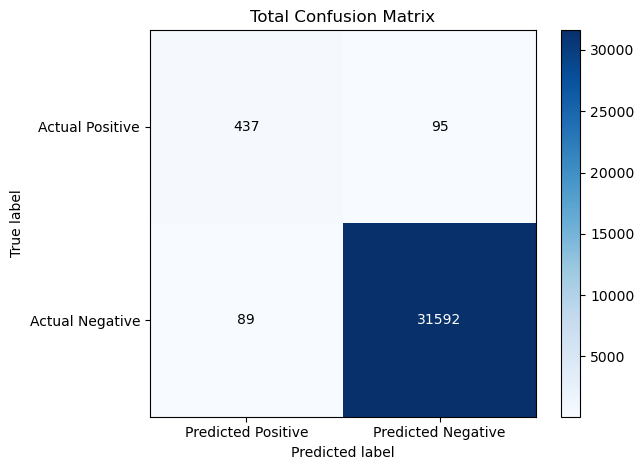

In [54]:
plot_confusion_matrix_macro(TP_total_all, FP_total_all, FN_total_all, TN_total_all)